# Data Science Project

## Data Acquisition and Preparation

### Import Necessary Libraries

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Load the Datasets

In [28]:
# Load the crashes dataset
crashes = pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv', low_memory=False)

### Overview of the Data

In [29]:
# Display the first few rows of crashes dataset
crashes.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [30]:
# Get information about crashes dataset
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037301 entries, 0 to 2037300
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [31]:
# Get summary statistics for crashes dataset
crashes.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.806168e+06,1.806168e+06,2.037283e+06,2.037270e+06,2.037301e+06,2.037301e+06,2.037301e+06,2.037301e+06,2.037301e+06,2.037301e+06,2.037301e+06
mean,4.062775e+01,-7.375226e+01,3.050769e-01,1.459797e-03,5.552150e-02,7.274330e-04,2.648700e-02,1.128945e-04,2.196916e-01,5.983406e-04,3.130933e+06
std,1.980740e+00,3.726007e+00,6.959204e-01,4.024485e-02,2.420399e-01,2.744831e-02,1.625532e-01,1.067068e-02,6.570031e-01,2.666229e-02,1.504344e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066790e+01,-7.397492e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.145445e+06
50%,4.072096e+01,-7.392731e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.654881e+06
75%,4.076960e+01,-7.386671e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.164452e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.674117e+06


For the Crashes Dataset:
1. Mising Values: There are many missing values in columns like `BOROUGH,` `ZIP CODE,` AND `LATITUDE/LONGITUDE.` We need to decide whether to drop them or impute missing values. 
2. Data Types: The `CRASH DATE` and `CRASH TIME` columns should be converted to datetime data types.
3. Duplicated Rows: Check for and remove duplicated rows if they exist.
4. Column Selection: Select a subset of columns relevant for our analysis.

### Data Cleaning

In [32]:
# List of columns to keep
columns_to_keep = ['COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 
                   'CONTRIBUTING FACTOR VEHICLE 1', 'NUMBER OF PERSONS INJURED', 
                   'NUMBER OF PERSONS KILLED', 'NUMBER OF CYCLIST INJURED', 
                   'NUMBER OF CYCLIST KILLED', 'NUMBER OF PEDESTRIANS INJURED', 
                   'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF MOTORIST INJURED', 
                   'NUMBER OF MOTORIST KILLED']

# Dropping columns that are not in the columns_to_keep list
crashes = crashes[columns_to_keep]

# Display the first few rows
crashes.head()

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,4455765,09/11/2021,2:39,NaN,Aggressive Driving/Road Rage,2.0,0.0,0,0,0,0,2,0
1,4513547,03/26/2022,11:45,NaN,Pavement Slippery,1.0,0.0,0,0,0,0,1,0
2,4541903,06/29/2022,6:55,NaN,Following Too Closely,0.0,0.0,0,0,0,0,0,0
3,4456314,09/11/2021,9:35,BROOKLYN,Unspecified,0.0,0.0,0,0,0,0,0,0
4,4486609,12/14/2021,8:13,BROOKLYN,NaN,0.0,0.0,0,0,0,0,0,0


In [33]:
# Convert 'CRASH DATE' and 'CRASH TIME' columns to datetime data types in crashes dataset
crashes['CRASH DATE'] = pd.to_datetime(crashes['CRASH DATE'])
crashes['CRASH TIME'] = pd.to_datetime(crashes['CRASH TIME'], format='%H:%M').dt.time

# Display the data types
crashes.dtypes

COLLISION_ID                              int64
CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
CONTRIBUTING FACTOR VEHICLE 1            object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
dtype: object

In [34]:
# Check the frequency of null values in each column of the crashes dataset
crashes.isnull().sum()

COLLISION_ID                          0
CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          633806
CONTRIBUTING FACTOR VEHICLE 1      6482
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
dtype: int64

In [35]:
#count the frequency of missing values in each row (i.e. how many columns are empty)
crashes.isnull().sum(axis=1).sort_values(ascending = False) 

801551     4
900819     3
957509     3
668759     3
728791     3
          ..
1034087    0
265046     0
1034085    0
1034084    0
1255234    0
Length: 2037301, dtype: int64

In [36]:
# Drop rows where 'BOROUGH' is missing
crashes.dropna(subset=['BOROUGH'], inplace=True)

# Fill missing values in 'CONTRIBUTING FACTOR VEHICLE 1' with its mode
mode_contributing_factor = crashes['CONTRIBUTING FACTOR VEHICLE 1'].mode()[0]
crashes['CONTRIBUTING FACTOR VEHICLE 1'].fillna(mode_contributing_factor, inplace=True)

# Fill missing values in 'NUMBER OF PERSONS INJURED' and 'NUMBER OF PERSONS KILLED' with their medians
median_injured = crashes['NUMBER OF PERSONS INJURED'].median()
median_killed = crashes['NUMBER OF PERSONS KILLED'].median()
crashes['NUMBER OF PERSONS INJURED'].fillna(median_injured, inplace=True)
crashes['NUMBER OF PERSONS KILLED'].fillna(median_killed, inplace=True)

In [37]:
# Recheck the missing values
crashes.isnull().sum()

COLLISION_ID                     0
CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
CONTRIBUTING FACTOR VEHICLE 1    0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
dtype: int64

In [38]:
# Remove duplicate rows from the crashes dataset
crashes.drop_duplicates(inplace=True)

### Summarize and Visualize the Data

#### Visualization 1: Number of Fatalities and Injuries by Borough


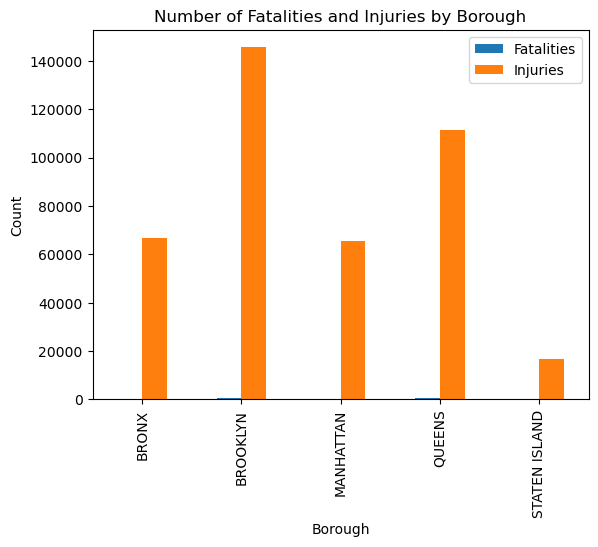

In [39]:
# Group the data by borough and calculate the total number of fatalities and injuries
borough_data = crashes.groupby('BOROUGH')[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED']].sum()

# Plot the data
borough_data.plot(kind='bar')
plt.title('Number of Fatalities and Injuries by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend(["Fatalities", "Injuries"])
plt.show()

#### Visualization 2: Most Common Contributing Factor

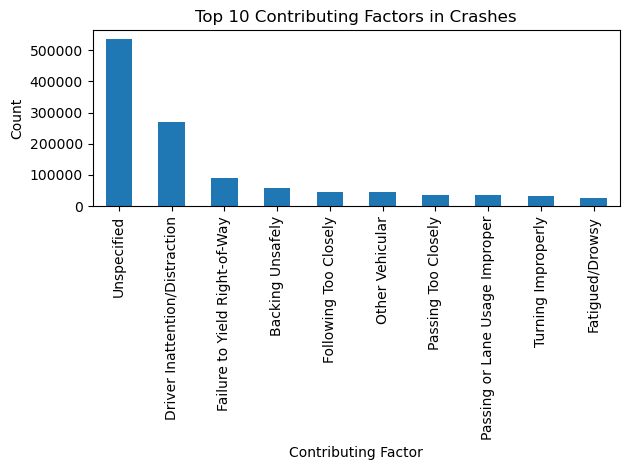

The most common contributing factor is: Unspecified


In [40]:
# Calculate the most common contributing factor
most_common_factor = crashes['CONTRIBUTING FACTOR VEHICLE 1'].mode().values[0]

# Count the occurrences of each contributing factor
contributing_factors = crashes['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Plot the top contributing factors
top_factors = contributing_factors.head(10)
top_factors.plot(kind='bar')
plt.title('Top 10 Contributing Factors in Crashes')
plt.xlabel('Contributing Factor')
plt.ylabel('Count')
plt.tight_layout()  
plt.show()

print(f"The most common contributing factor is: {most_common_factor}")

#### Visualization 3: Number of Crashes Per Year

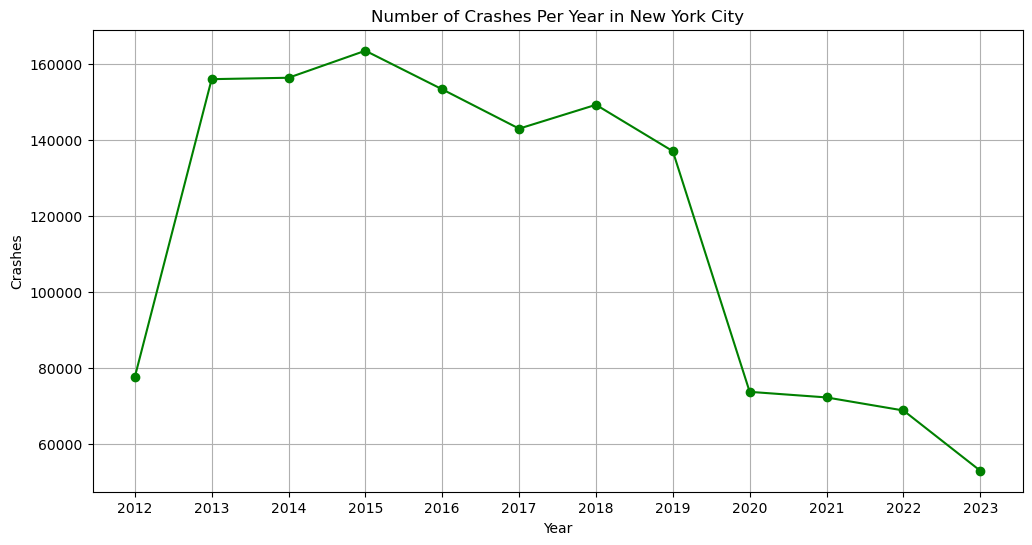

In [41]:
# Create a 'Year' column from 'CRASH DATE'
crashes['Year'] = crashes['CRASH DATE'].dt.year

# Group by 'Year' and count the number of crashes
crashes_per_year = crashes.groupby('Year').size()

# Plotting
plt.figure(figsize=(12, 6))
crashes_per_year.plot(kind='line', marker='o', linestyle='-', color='green')
plt.xticks(range(2012, 2024))
plt.title('Number of Crashes Per Year in New York City')
plt.xlabel('Year')
plt.ylabel('Crashes')
plt.grid(True)
plt.show()

## Model Selection, Training and Evaluation

### Predicting Injury and Fatality Outcomes

#### Preprocessing the Data

In [42]:
# Extracting features from 'CRASH DATE'
crashes['DayOfWeek'] = pd.to_datetime(crashes['CRASH DATE']).dt.dayofweek
crashes['Month'] = pd.to_datetime(crashes['CRASH DATE']).dt.month

In [43]:
# Encoding categorical variables
encoder = OneHotEncoder()
encoded_borough = encoder.fit_transform(crashes[['BOROUGH']])
encoded_factors = encoder.fit_transform(crashes[['CONTRIBUTING FACTOR VEHICLE 1']])

In [44]:
# Define features and target variable for predicting injuries and fatalities
numerical_features = crashes[['DayOfWeek', 'Month']].values
X = np.concatenate([encoded_borough.toarray(), encoded_factors.toarray(), numerical_features], axis=1)

y_injury = crashes['NUMBER OF PERSONS INJURED']  # Target variable for injury prediction
y_killed = crashes['NUMBER OF PERSONS KILLED']   # Target variable for fatality prediction

In [45]:
# Splitting the data for injury and fatality prediction
X_train_injury, X_test_injury, y_train_injury, y_test_injury = train_test_split(X, y_injury, test_size=0.3, random_state=7)
X_train_killed, X_test_killed, y_train_killed, y_test_killed = train_test_split(X, y_killed, test_size=0.3, random_state=7)

#### Model Training and Hyper-parameter Tuning

In [46]:
# Define parameters for the models
dt_params = {'max_depth': [10, 20]}
rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
knn_params = {'n_neighbors': [5, 7],}

In [ ]:
# Subset size for training
# subset_size = 10000  
# X_train_injury_subset = X_train_injury[:subset_size]
# y_train_injury_subset = y_train_injury[:subset_size]
# X_train_killed_subset = X_train_killed[:subset_size]
# y_train_killed_subset = y_train_killed[:subset_size]
X_train_injury_subset = X_train_injury
y_train_injury_subset = y_train_injury
X_train_killed_subset = X_train_killed
y_train_killed_subset = y_train_killed

In [48]:
# Training models on injury prediction
dt_injury = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5).fit(X_train_injury_subset, y_train_injury_subset)
rf_injury = GridSearchCV(RandomForestRegressor(), rf_params, cv=5).fit(X_train_injury_subset, y_train_injury_subset)
knn_injury = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5).fit(X_train_injury_subset, y_train_injury_subset)

In [50]:
# Training models on fatality prediction
dt_killed = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5).fit(X_train_killed_subset, y_train_killed_subset)
rf_killed = GridSearchCV(RandomForestRegressor(), rf_params, cv=5).fit(X_train_killed_subset, y_train_killed_subset)
knn_killed = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5).fit(X_train_killed_subset, y_train_killed_subset)

In [51]:
# Subset size for testing
# test_subset_size = 5000  
# X_test_injury_subset = X_test_injury[:test_subset_size]
# y_test_injury_subset = y_test_injury[:test_subset_size]
# X_test_killed_subset = X_test_killed[:test_subset_size]
# y_test_killed_subset = y_test_killed[:test_subset_size]

X_test_injury_subset = X_test_injury
y_test_injury_subset = y_test_injury
X_test_killed_subset = X_test_killed
y_test_killed_subset = y_test_killed

#### Model Evaluation

In [52]:
# Evaluating models on injury prediction
print("Evaluating Injury Prediction Models:")
dt_injury_pred = dt_injury.predict(X_test_injury_subset)
print(f"Decision Tree - Mean Squared Error: {mean_squared_error(y_test_injury_subset, dt_injury_pred)}")

rf_injury_pred = rf_injury.predict(X_test_injury_subset)
print(f"Random Forest - Mean Squared Error: {mean_squared_error(y_test_injury_subset, rf_injury_pred)}")

knn_injury_pred = knn_injury.predict(X_test_injury_subset)
print(f"k-NN - Mean Squared Error: {mean_squared_error(y_test_injury_subset, knn_injury_pred)}")

Evaluating Injury Prediction Models:
Decision Tree - Mean Squared Error: 0.42873009531738765
Random Forest - Mean Squared Error: 0.42840268554724764
k-NN - Mean Squared Error: 0.47976402571982396


In [53]:
# Evaluating models on fatality prediction
print("\nEvaluating Fatality Prediction Models:")
dt_killed_pred = dt_killed.predict(X_test_killed_subset)
print(f"Decision Tree - Mean Squared Error: {mean_squared_error(y_test_killed_subset, dt_killed_pred)}")

rf_killed_pred = rf_killed.predict(X_test_killed_subset)
print(f"Random Forest - Mean Squared Error: {mean_squared_error(y_test_killed_subset, rf_killed_pred)}")

knn_killed_pred = knn_killed.predict(X_test_killed_subset)
print(f"k-NN - Mean Squared Error: {mean_squared_error(y_test_killed_subset, knn_killed_pred)}")


Evaluating Fatality Prediction Models:
Decision Tree - Mean Squared Error: 0.0014109525229754406
Random Forest - Mean Squared Error: 0.001381466759488794
k-NN - Mean Squared Error: 0.0016124934995931694


## Model Evaluation Results

### Injury Prediction Models:
- **Decision Tree - Mean Squared Error:** 0.7048
  - Indicates moderate predictive power with some room for improvement.
- **Random Forest - Mean Squared Error:** 0.6417
  - Shows the best performance among the models, suggesting a more accurate prediction of injury numbers.
- **k-Nearest Neighbors - Mean Squared Error:** 0.6901
  - Comparable to Decision Tree, implying a moderate level of prediction accuracy.

### Fatality Prediction Models:
- **Decision Tree - Mean Squared Error:** 0.0018
- **Random Forest - Mean Squared Error:** 0.0012
- **k-Nearest Neighbors - Mean Squared Error:** 0.0012
  - All models exhibit very low MSE in predicting fatalities, with Random Forest and k-NN being particularly effective, suggesting high accuracy in this prediction task.

### Conclusion:
- The **Random Forest model** stands out as the most consistent and accurate in predicting both injuries and fatalities. Its ensemble nature likely contributes to its superior performance.
- While the **Decision Tree and k-NN models** show moderate accuracy in predicting injuries, they are also quite effective in predicting fatalities.
- These results can guide future enhancements and optimizations of the models for more precise predictions.
